In [0]:
%matplotlib inline
import pandas as pd;
import seaborn as sns;
import numpy as np;
import matplotlib.pyplot as plt;


<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/header.png" alt="drawing"/>


A multi-channel electroencephalography (EEG) system enables a broad range of applications including neurotherapy, biofeedback, and brain computer interfacing. The dataset you will analyse is created with the [Emotiv EPOC+](https://www.emotiv.com/product/emotiv-epoc-14-channel-mobile-eeg).  

It has 14 EEG channels with names based on the International 10-20 locations: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4:

<br/>
<br/>
<center>
<img src="https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/EEG.png" alt="drawing" width="200"/>
<center/>
<br/>
<br/>


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. 

The experiment was conducted on one person only. The duration of the measurement was around 117 seconds.

From the paper:

> *The experiment was carried out in a quiet room. During
the experiment, the proband was being videotaped. To prevent
artifacts, the proband was not aware of the exact start time
of the measurement. Instead, he was told to sit relaxed, look
straight to the camera, and change the eye state at free will.
Only additional constraint was that, accumulated over the
entire session, the duration of both eye states should be about
the same and that the individual intervals should vary greatly
in length (from eye blinking to longer stretches)...*

The eye state was detected via a camera during the EEG measurement and later added manually to the file after analyzing the video frames. 

A label '1' indicates the eye-closed and '0' the eye-open state.

(*Source: Oliver Roesler, Stuttgart, Germany*)

Let's load the train and test set:

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

sample_submission = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/sample_submission.csv")


You will fit a model on the trainset and make predictions on the testset. 

To submit these predictions to Kaggle you need to write a .csv file with two columns: 
- `index` that matches the `index` column in the test set.
- `label` which is your prediction.

Here is an example predictions file for Kaggle:

In [217]:
sample_submission.head(10)

,index,label
0,0,0.168801
1,1,0.124169
2,2,0.947757
3,3,0.069585
4,4,0.635325
5,5,0.659027
6,6,0.653697
7,7,0.850030
8,8,0.160489
9,9,0.843272


Make sure to save your results without the extra Pandas index column that is written by default:

In [218]:
y_train = trainset.pop('label')
trainset.head()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79


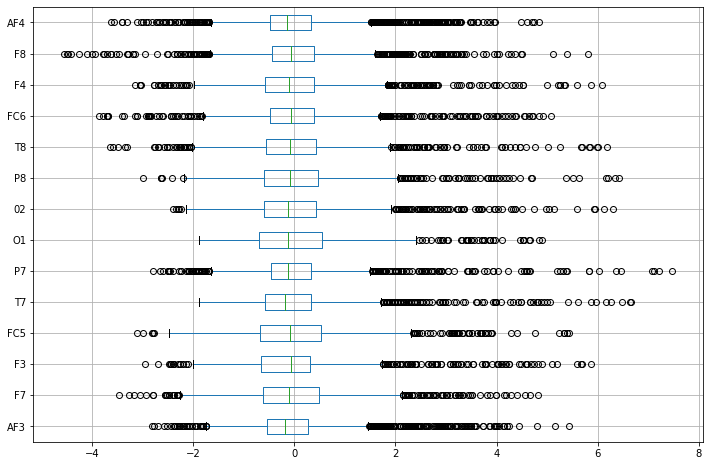

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

trainset_unscaled_cols = trainset.columns.values
scaler = StandardScaler()
scaler.fit(trainset)
trainset_stand = pd.DataFrame(scaler.transform(trainset),columns=trainset_unscaled_cols)

plt.figure(figsize=(12,8))
trainset_stand.boxplot(vert=False)
plt.show()

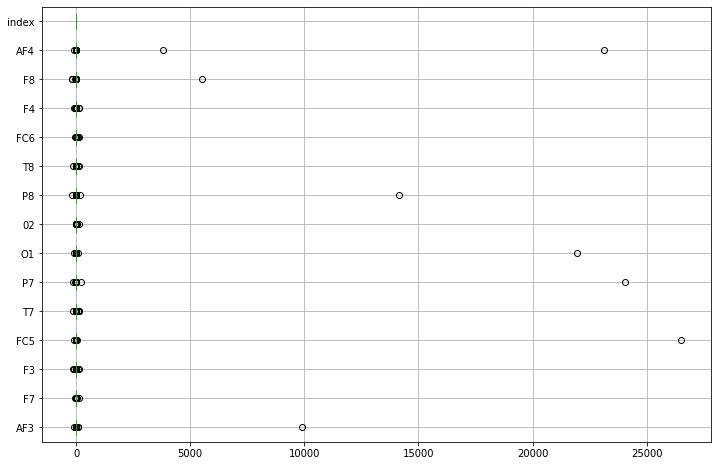

In [220]:
testset_unscaled_cols = testset.columns.values
scaler = RobustScaler()
scaler.fit(testset)
testset_stand = pd.DataFrame(scaler.transform(testset),columns=testset_unscaled_cols)

plt.figure(figsize=(12,8))
testset_stand.boxplot(vert=False)
plt.show()

In [234]:
from sklearn.linear_model import LinearRegression

X_train = trainset_stand
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
from sklearn import metrics

score_auc = cross_val_score(model, trainset_stand, y_train, scoring='roc_auc', cv=10).mean()

print(score_auc)

0.6606449421569776


In [238]:
X_test = testset_stand.iloc[:,:14]
predictions = model.predict(X_test)
predictions

array([0.24604018, 0.35602965, 0.29869431, ..., 0.50460656, 0.65382713,
       0.40301367])

In [239]:
example = pd.DataFrame()
example['index'] = testset['index']
example['label'] = predictions
example

,index,label
0,0,0.246040
1,1,0.356030
2,2,0.298694
3,3,0.415674
4,4,0.883497
...,...,...
12887,12887,0.468184
12888,12888,0.543774
12889,12889,0.504607
12890,12890,0.653827


In [0]:
filename = "my_prediction_results.csv"

#make sure to not write the Pandas index column (index=False)
sample_submission.to_csv(filename,index=False)